In [2]:
!pip install investpy

  Created wheel for investpy: filename=investpy-1.0.6-py3-none-any.whl size=4485152 sha256=710d85fa49a59125dedd200558d842cbfb3779ccd03d43396e013fc67eba1e49
  Stored in directory: c:\users\cliente\appdata\local\pip\cache\wheels\a7\1e\87\2ae431904bf97fd9f67b04d6859dd988111ef91f4b6b80d69e
Successfully built investpy


In [7]:
pip install --upgrade mpl_finance

Note: you may need to restart the kernel to use updated packages.


In [11]:
import mplfinance as mpf

In [19]:
import investpy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [22]:
from mplfinance.original_flavor import candlestick_ohlc

In [26]:
acao2 = 'BPAC11'

df_bolsa = investpy.get_stock_historical_data(stock=acao2,
                                          country='brazil',
                                          from_date='01/01/2015',
                                          to_date='02/06/2021')

df_bolsa.index.names = ['Data']
df_bolsa.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Volume', 'Moeda']

In [27]:
df_ = df_bolsa.copy(deep=True)

df_['Data'] = df_.index.map(mdates.date2num)

# compute the simple moving average
df_['ema21'] = df_['Fechamento'].ewm(span=21, adjust=False).mean()

In [28]:
print(df_)

            Abertura  Maximo  Minimo  Fechamento   Volume Moeda     Data  \
Data                                                                       
2017-02-17     18.00   18.00   18.00       18.00     5000   BRL  17214.0   
2017-02-24     18.20   18.20   18.20       18.20     1300   BRL  17221.0   
2017-03-01     18.20   18.20   17.95       17.95     4300   BRL  17226.0   
2017-03-03     19.00   19.00   18.50       18.75     1800   BRL  17228.0   
2017-03-06     18.80   19.50   18.50       19.20     5700   BRL  17231.0   
...              ...     ...     ...         ...      ...   ...      ...   
2021-05-27    121.88  124.18  121.15      123.00  7710900   BRL  18774.0   
2021-05-28    123.49  123.94  121.33      122.94  2631000   BRL  18775.0   
2021-05-31    125.00  125.77  123.25      124.30  3667900   BRL  18778.0   
2021-06-01    125.79  125.79  119.61      122.00  4385900   BRL  18779.0   
2021-06-02    122.20  123.38  120.00      121.30  3955700   BRL  18780.0   

           

In [29]:
tendencia_alta=1
for i in range(6):
  if(df_.ema21[-i-1] < df_.ema21[-i-2]):
    tendencia_alta=0

In [30]:
print()
if(tendencia_alta==1):
    print(acao2 + ' está em tendência de alta!')
else:
    print(acao2 + ' não está em tendência de alta!')


BPAC11 está em tendência de alta!


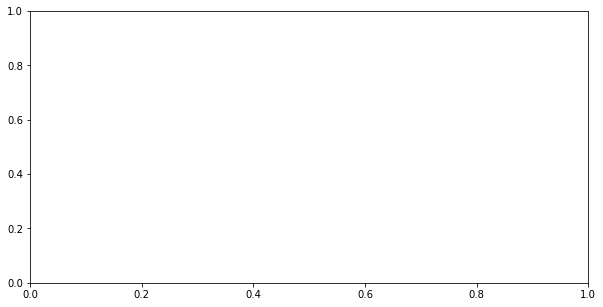

In [31]:
# Plot Chart 
ohlc = df_[['Data', 'Abertura', 'Maximo', 'Minimo', 'Fechamento']]

f1, ax = plt.subplots(figsize=(10, 5))

In [32]:
# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

In [33]:
# plot the moving average lines
label_ = acao2.upper() + ' ma21'
ax.plot(df_.index, df_['ema21'], color='yellow', label=label_)
# ax.plot(df.index, df['ema100'], color = 'purple', label = 'ma100')


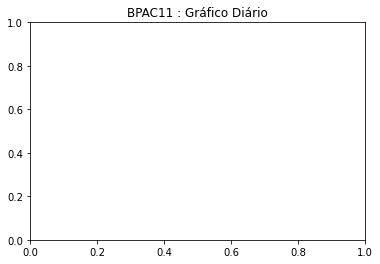

In [34]:
# other parameters
ax.grid(False)
ax.legend()
plt.title(acao2.upper() + ' : Gráfico Diário')
plt.show(block=True)
del (df_)

In [ ]:
(: